## Andrew NG Machine Learning Course - Exercise 1 - Linear Regression

### Linear Regression with one variable.

Here we load data from ex1data1.txt. This contains a dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city.

In [1]:
# Let's print out the first 5 lines to see what our data looks like!

with open("ex1/ex1data1.txt") as datafile:
    head = [next(datafile) for x in range(5)]
print(head)

['6.1101,17.592\n', '5.5277,9.1302\n', '8.5186,13.662\n', '7.0032,11.854\n', '5.8598,6.8233\n']


In [2]:
# Looks like a CSV. Let's load it into a data frame.

import pandas as pd 

df = pd.read_csv("ex1/ex1data1.txt", header = None) 
# Preview the first 5 lines of the loaded data 
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


<Figure size 432x288 with 0 Axes>

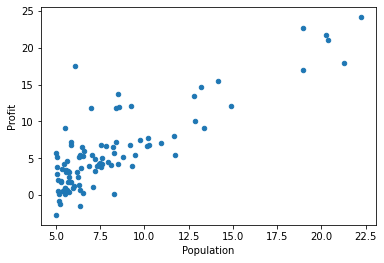

In [3]:
# Let's plot the data next.

import matplotlib.pyplot as plt
plt.figure(1) 
df.columns = ['Population','Profit']
df.plot(x ='Population', y='Profit', kind = 'scatter')
plt.show()

Looks like we have a linear relationship between Population and Profit. Let's fit a linear model using gradient descent. Obviously we could get a library to do this for us but we'll do it manually.

In [4]:
import numpy as np

m = df['Population'].count()
print("Number of rows/training examples are: ", m)

# Let's make our variable matrix X.
# We need to take the Population columnn from our data and add
# another dimension to accomodate the theta0 intercept term.

population = df['Population'].to_numpy()
intercept = np.ones((m))

X = np.hstack((intercept.reshape(-1,1),population.reshape(-1,1)))

print("First 5 rows of X are: ")
print(X[0:5,:])

Number of rows/training examples are:  97
First 5 rows of X are: 
[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]]


In [5]:
# Create y
y = df['Profit'].to_numpy().reshape(-1,1)

print("First 5 rows of y are: ")
print(y[0:5,:])

# Initialiase theta as zero.
initial_theta = np.zeros((2,1))
print("Initial Theta is: ")
print(initial_theta)

First 5 rows of y are: 
[[17.592 ]
 [ 9.1302]
 [13.662 ]
 [11.854 ]
 [ 6.8233]]
Initial Theta is: 
[[0.]
 [0.]]


In [6]:
# Define the cost function
def cost_function(X, theta, y):
    m = np.size(X,0)
    # X*theta - y
    delta = np.subtract(np.dot(X,theta),y)
    # 0.5 * m * (X*theta - y)' * (X*theta - y)
    return (1/(2*m))*(np.dot(delta.transpose(),delta))[0][0]
    

In [7]:
print("Expected cost: 32.07")
print("Actual cost: ", cost_function(X,initial_theta,y))

Expected cost: 32.07
Actual cost:  32.072733877455676


<Figure size 432x288 with 0 Axes>

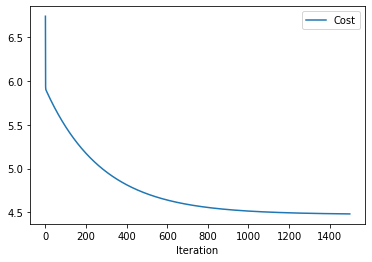

In [8]:
# Gradient Descent

iterations = 1500
alpha = 0.01


def gradient_descent(initial_theta, X, y, alpha, iterations):
    theta = initial_theta

    iteration_num = []
    J_history = []
    for i in range(0, iterations):
        theta = theta - (alpha/m) * (np.dot(X.transpose(),(np.dot(X,theta)-y)))
        J_history.append(cost_function(X,theta,y))
        iteration_num.append(i)
        
    return theta, J_history, iteration_num

theta, J_history, iteration_num = gradient_descent(initial_theta, X, y, alpha, iterations)
    
# Plot cost over iterations.
J_df = pd.DataFrame(iteration_num, J_history)
J_df = pd.DataFrame(
    {'Iteration': iteration_num,
     'Cost': J_history
    })

J_df.head()

plt.figure(2) 
J_df.plot(x='Iteration', y='Cost', kind = 'line')
plt.show()


<Figure size 432x288 with 0 Axes>

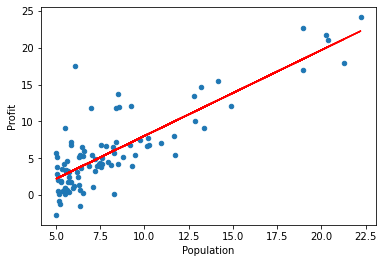

In [9]:
plt.figure(1)
x = df['Population']
df.plot(x ='Population', y='Profit', kind = 'scatter')
plt.plot(x, theta[1]*x + theta[0],'r-')
plt.show()

In [10]:
# Profit prediction for a city with 35,000 people.

print("Predicted profit for 35,000 people is: ", np.dot([1, 3.5],theta)[0]*10000)
print("Predicted profit for 70,000 people is: ", np.dot([1, 7],theta)[0]*10000)


Predicted profit for 35,000 people is:  4519.7678677017675
Predicted profit for 70,000 people is:  45342.45012944714


In [11]:
# Let's do the above example using scikit learn.

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X[:,1].reshape(-1,1), y)

print("sklearn says the coeff is: ", reg.coef_[0][0])
print("We predicted the coef to be: ", theta[1,0])
print("sklearn says the intercept is: ", reg.intercept_[0])
print("We predicted the intercept to be: ", theta[0,0])

#rg.predict(np.array([[10]]))

sklearn says the coeff is:  1.1930336441895935
We predicted the coef to be:  1.166362350335582
sklearn says the intercept is:  -3.89578087831185
We predicted the intercept to be:  -3.63029143940436


### Linear regression with multiple variables

House selling problem, size of house (square feet), number of bedrooms, house price

In [12]:
df = pd.read_csv("ex1/ex1data2.txt", header = None) 
# Preview the first 5 lines of the loaded data 
df.head()


,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


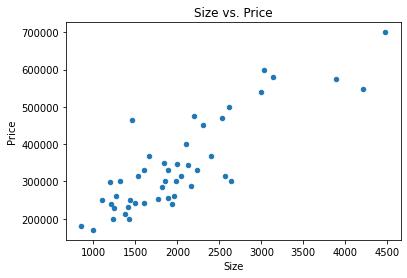

In [13]:
df.columns = ['Size','No of Bedrooms', 'Price']
df.plot(x ='Size', y='Price', kind = 'scatter', title = 'Size vs. Price')
plt.show()

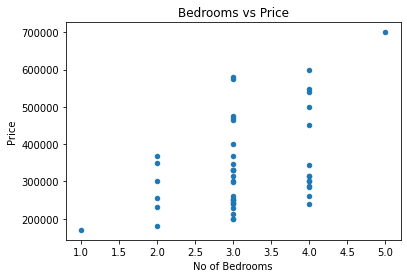

In [14]:
df.plot(x ='No of Bedrooms', y='Price', kind = 'scatter',title = 'Bedrooms vs Price')
plt.show()

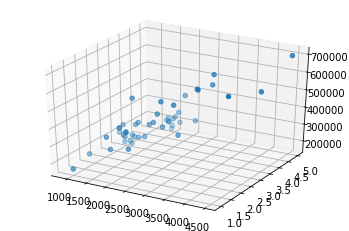

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=df['Size'], ys=df['No of Bedrooms'], zs=df['Price'], zdir='z', s=20, c=None, depthshade=True)

In [16]:
# Given the variation in the range of values between number of 
# bedrooms and size we will now perform feature scaling.
# Subtract the mean and divide by the standard deviation for each feature.
normalised_df=(df-df.mean())/df.std()
normalised_df.head()

,Size,No of Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [17]:
# Initialiase theta as zero.
initial_theta = np.zeros((3,1))
print("Initial Theta is: ")
print(initial_theta)

Initial Theta is: 
[[0.]
 [0.]
 [0.]]


In [18]:
m = normalised_df['Size'].count()
print("Number of rows/training examples are: ", m)

# Let's make our variable matrix X.
# We need to take the Population columnn from our data and add
# another dimension to accomodate the theta0 intercept term.

size = normalised_df['Size'].to_numpy()
no_of_bedrooms = normalised_df['No of Bedrooms'].to_numpy()
intercept = np.ones((m))

X = np.hstack((intercept.reshape(-1,1),size.reshape(-1,1),no_of_bedrooms.reshape(-1,1)))

print("First 5 rows of X are: ")
print(X[0:5,:])

Number of rows/training examples are:  47
First 5 rows of X are: 
[[ 1.          0.13000987 -0.22367519]
 [ 1.         -0.50418984 -0.22367519]
 [ 1.          0.50247636 -0.22367519]
 [ 1.         -0.73572306 -1.53776691]
 [ 1.          1.25747602  1.09041654]]


In [19]:
# Let's create y
y = df['Price'].to_numpy().reshape(-1,1)

<Figure size 432x288 with 0 Axes>

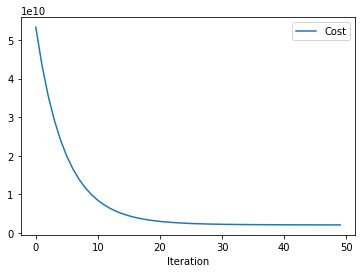

In [20]:
alpha = 0.1
iterations = 50

def train_and_plot(alpha,iterations):
    theta, J_history, iteration_num = gradient_descent(initial_theta, X, y, alpha, iterations)

    # Plot cost over iterations.
    J_df = pd.DataFrame(iteration_num, J_history)
    J_df = pd.DataFrame(
        {'Iteration': iteration_num,
         'Cost': J_history
        })

    J_df.head()

    plt.figure(2) 
    J_df.plot(x='Iteration', y='Cost', kind = 'line')
    plt.show()

train_and_plot(alpha,iterations)

<Figure size 432x288 with 0 Axes>

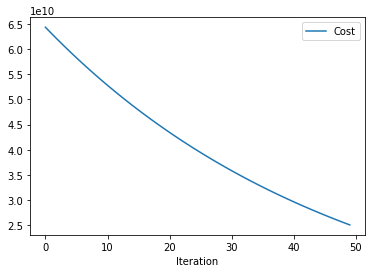

In [21]:
alpha = 0.01
train_and_plot(alpha,iterations)

<Figure size 432x288 with 0 Axes>

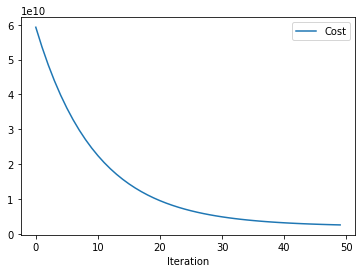

In [22]:
alpha = 0.05
train_and_plot(alpha,iterations)